# Algoritmo genetico

La búsqueda de la combinación óptima de hiperparámetros en modelos de redes neuronales convolucionales es un desafío fundamental en el campo del aprendizaje profundo. En este contexto, se ha desarrollado un algoritmo genético inspirado en la arquitectura ResNet que aborda esta tarea de manera eficiente. 

Este algoritmo genera generaciones de individuos, cada uno representando un conjunto único de hiperparámetros para las capas convolucionales del modelo. A medida que evolucionan las generaciones, el algoritmo selecciona y reproduce los individuos más prometedores para encontrar la configuración óptima. En la fase 0 se crea la base del modelo.

Una vez que se alcanza esta configuración, el algoritmo progresa a la siguiente fase, donde congela los pesos de las capas convolucionales del modelo previamente optimizado y añade nuevas capas al final. Esta segunda fase se enfoca en encontrar los hiperparámetros óptimos para estas nuevas capas, lo que lleva a la creación de un modelo completo altamente eficaz y adaptable a la tarea específica en cuestión.



## Esquema genetico
El esquema genético está compuesto por un conjunto de parámetros que guían el proceso de evolución y optimización de modelos de redes neuronales. Este esquema se define en un diccionario llamado `options`, que contiene una serie de características clave que se explorarán y optimizarán durante el proceso. A continuación, se explica la naturaleza de este esquema:

- `a_include_BN` y `b_include_BN`: Estos parámetros determinan si se debe incluir una capa de normalización por lotes (*Batch Normalization*) en dos partes del modelo, A y B.

- `a_include_bias` y `b_include_bias`: Controlan si se debe incluir un término de sesgo en las capas A y B.

- `activation_type`: Define el tipo de función de activación que se utilizará, con opciones como *ReLU*, *ELU*, *LeakyReLU* y *SELU*.

- `include_layer`: Indica si se debe incluir una capa en el modelo o no.

- `pool_type`: Define el tipo de operación de pooling a utilizar.

- `include_skip`: Controla si se debe incluir una conexión de salto (*skip connection*) en el modelo.

- `learning_rate`: Especifica la tasa de aprendizaje que se utilizará durante el entrenamiento del modelo.

- `dropout_range_a` y `dropout_range_b`: Estos parámetros definen los rangos de valores para la técnica de *dropout* que se aplicará en las capas A y B del modelo, respectivamente.

Cada uno de estos parámetros representa una característica específica del modelo que se puede configurar y optimizar durante el proceso de evolución genética. El algoritmo genético explorará diferentes combinaciones de estos parámetros para encontrar la configuración óptima que maximice el rendimiento del modelo en una tarea dada. Este enfoque permite una búsqueda eficiente de hiperparámetros y una adaptación del modelo a la tarea de manera dinámica.

## Clase Para generar el modelo

En mi proyecto, he generado una clase llamada `MyModel` utilizando el módulo Lightning de PyTorch. Esta clase se utiliza para definir un modelo de aprendizaje profundo. La particularidad de este modelo es que sus hiperparámetros de capa son tomados de una población inicial generada aleatoriamente, lo que permite una exploración más amplia del espacio de hiperparámetros.

Dentro del metodo init, se definen los hiperparametros de las capas, la inicializacion de estos hiperparametros esta gobernada por los valores del cromosoma. 

Despues de la fase 0 de entrenamiento, se inicializa una variable con el mejor modelo de la fase previa, y se congelan los pesos de las capas anteriores a la última. Esto asegura que el modelo no pierda conocimiento importante durante las fases posteriores. 

La clase `MyModel` consta de varias capas convolucionales, capas de normalización, funciones de activación, capas de dropout y capas de pooling, cuyos hiperparámetros son personalizables a través del cromosoma. La función `forward` define cómo se propagan los datos a través del modelo, y se incluyen métodos para entrenamiento, validación y prueba, junto con la configuración de optimizadores. Esta clase es versátil y se puede adaptar fácilmente para diferentes problemas de aprendizaje profundo.

En el metodo configure_optimezers nos aseguramos que el optimizador solo actualice los pesos de las capas que no estan congeladas

```python
    def configure_optimizers(self):
        if self.fase == 0:
            optimizer = torch.optim.SGD(self.parameters(), lr=self.cromosoma['learning_rate'])
        else:
            optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, self.parameters()), lr=self.cromosoma['learning_rate'])
        return optimizer
```

## Clase del algorimto genetico

En mi proyecto, he implementado una clase llamada `Generation` que desempeña un papel fundamental en la generación y evolución de poblaciones de cromosomas en un algoritmo genético. Esta clase se encarga de gestionar las fases del algoritmo genético y realiza operaciones clave como la mutación y el cruce de cromosomas. Lo notable es que la clase está diseñada de manera flexible, sin código duro, lo que significa que todos los parámetros necesarios para su funcionamiento se pueden configurar al inicializarla.

En el constructor (`__init__`) de la clase, se inicializan parámetros como el tamaño de la población, la tasa de mutación, el número de mutaciones, la fase actual, y otros parámetros esenciales. La población inicial se genera de forma aleatoria, y se entrena un modelo para cada cromosoma en la población. Posteriormente, se guardan los mejores candidatos en `self.mejores_candidatos`.

La clase incluye métodos como `generate` para generar una nueva generación de cromosomas, `crossover` para realizar el cruce de cromosomas y `mutation` para aplicar mutaciones. Además, se sigue un enfoque de supervivencia de individuos aptos y se mantienen los mejores candidatos a lo largo de las generaciones. Esta flexibilidad y modularidad en la implementación permiten ajustar y adaptar fácilmente los parámetros del algoritmo genético para diferentes aplicaciones y problemas de optimización.


## Generar la poblacion inicial

En la fase 0 del algoritmo genético, se genera una población inicial de manera aleatoria, utilizando como base el diccionario options_phase0. Este diccionario contiene una serie de parámetros y sus respectivos rangos de valores posibles.

Funcion que retorna los valores aleatorios del diccionario
```python
  def random_hyper(phase):
      if phase == 0:
          return {
          'a_include_BN': options_phase0['a_include_BN'][np.random.randint(len(options_phase0['a_include_BN']))],
          'a_include_bias': options_phase0['a_include_bias'][np.random.randint(len(options_phase0['a_include_bias']))],
          'activation_type': options_phase0['activation_type'][np.random.randint(len(options_phase0['activation_type']))],
          'b_include_BN': options_phase0['b_include_BN'][np.random.randint(len(options_phase0['b_include_BN']))],
          'b_include_bias': options_phase0['b_include_bias'][np.random.randint(len(options_phase0['b_include_bias']))],
          'pool_type': options_phase0['pool_type'][np.random.randint(len(options_phase0['pool_type']))],
          'learning_rate': options_phase0['learning_rate'][np.random.randint(len(options_phase0['learning_rate']))],
          'dropout_range_a': options_phase0['dropout_range_a'][np.random.randint(len(options_phase0['dropout_range_a']))],
          'dropout_range_b': options_phase0['dropout_range_b'][np.random.randint(len(options_phase0['dropout_range_b']))]
          }
```

Esta funcion se inicializa en la fase 0 en el metodo init de la clase 'Generation'

## Cruce de cromosomas
La función `crossover` es un método dentro de la clase `Generation` que se encarga de realizar la operación de cruce (crossover) entre dos cromosomas parentales, representados como diccionarios en Python. El punto de corte en los cromosomas parentales se determina aleatoriamente o se proporciona previamente con la variable endpoint, lo que permite una variabilidad en la creación de descendencia en el algoritmo genético.

A continuación, se proporciona una descripción detallada de esta función:

- **Nombre de la función**: `crossover`
- **Argumentos**:
    - `self`: La instancia actual de la clase `Generation`.
    - `A`: El primer cromosoma parental, representado como un diccionario que contiene los valores de los genes.
    - `B`: El segundo cromosoma parental, también representado como un diccionario con valores de genes.
- **Descripción**: Esta función tiene como objetivo crear nuevos cromosomas (hijos) a partir de dos cromosomas parentales, `A` y `B`, mediante el proceso de cruce genético. El comentario inicial explica brevemente el propósito de la función.

- **Variables utilizadas**:
    - `child_chromosome`: Un diccionario que se inicializa vacío y que contendrá los genes del cromosoma hijo resultante del cruce.
    - `self.endpoint`: Una variable que almacena la posición de "corte" en el cromosoma parental durante el cruce. Si esta variable no ha sido inicializada previamente en la instancia de la clase, se elige aleatoriamente un punto de corte entre 0 (incluido) y la longitud del cromosoma `A` (excluido) utilizando `np.random.randint`. Esto determina dónde se realizará el corte en los cromosomas parentales.

- **Proceso de cruce**:
    - Se itera a través de las claves (genes) del cromosoma `A` utilizando `enumerate` para obtener tanto la clave (`key`) como su índice (`idx`).
    - Si el índice `idx` es menor o igual a `self.endpoint`, se copia el gen correspondiente del cromosoma `A` al cromosoma hijo `child_chromosome`.
    - Si el índice `idx` es mayor que `self.endpoint`, se copia el gen correspondiente del cromosoma `B` al cromosoma hijo `child_chromosome`.

- **Resultado**:
    - Al final de la función, se devuelve el cromosoma hijo `child_chromosome`, que contiene una combinación de genes de los cromosomas parentales `A` y `B` después del proceso de cruce.

## Mutacion
El método `mutation` es una función dentro de la clase `Generation` que se encarga de realizar la operación de mutación en una población de cromosomas representados como diccionarios en Python. introduciendo aleatoriamente cambios en los genes de acuerdo con una tasa de mutación especificada.

A continuación, se proporciona una descripción detallada de esta función:

- **Nombre del método**: `mutation`
- **Argumentos**:
    - `self`: La instancia actual de la clase `Generation`.
    - `poblacion_nueva`: Una lista que contiene la población actual de cromosomas que se someterán a mutación.

- **Descripción**: Esta función tiene como objetivo introducir cambios aleatorios en los cromosomas de una población (`poblacion_nueva`) con una probabilidad determinada por `mutationRate`. El comentario inicial explica brevemente el propósito de la función.

- **Proceso de mutación**:
    - Se itera a través de cada cromosoma (`individuo`) en la población `poblacion_nueva` utilizando un bucle `for` y `enumerate`.
    - Dentro del bucle exterior, se realiza otro bucle (`for _ in range(self.numero_mutaciones)`) que determina cuántas mutaciones se aplicarán a cada cromosoma. Esto permite controlar la tasa de mutación por cromosoma.
    - En cada iteración del bucle interno, se genera un número aleatorio (`np.random.rand()`) y se compara con `mutationRate`. Si el número aleatorio es menor o igual a `mutationRate`, se procede a aplicar una mutación en el cromosoma.
    - Para realizar la mutación, se selecciona aleatoriamente un índice `indice` en el rango de la longitud del cromosoma (`len(individuo)`). Luego, se obtiene la clave (`key`) correspondiente a ese índice en el cromosoma.
    - Dependiendo de la fase actual (`self.fase`), se elige un nuevo valor para el gen en esa clave. Si `self.fase` no es igual a cero, se selecciona un nuevo valor de `options_phase0[key]` de forma aleatoria utilizando `np.random.randint`. Si `self.fase` es igual a cero, se realiza la misma operación con `options_phase0[key]`.
    - Finalmente, se actualiza el cromosoma `individuo` con el nuevo gen mutado, y se actualiza la población `poblacion_nueva` con el cromosoma modificado.

## Generacion

El método `generate` es una función dentro de la clase `Generation` que se encarga de generar una nueva generación de cromosomas en la misma fase de un algoritmo genético.

Este método juega un papel fundamental en la evolución de la población de cromosomas en un algoritmo genético, permitiendo la selección de candidatos aptos, la introducción de variabilidad mediante mutación y la creación de descendientes a través del cruce, todo dentro de la misma fase del algoritmo. Los mejores candidatos se conservan a lo largo de las generaciones para mejorar la calidad de la solución.

 A continuación, se proporciona una descripción detallada de esta función:

- **Nombre del método**: `generate`
- **Descripción**: Esta función se encarga de realizar varias etapas clave en la evolución de la población de cromosomas en un algoritmo genético. El comentario inicial explica brevemente el propósito de la función.

- **Proceso de generación**:
    1. Se calcula el número de candidatos aptos que deben ser preservados en la nueva generación. Esto se basa en el valor de `rango_supervivencia` y el tamaño de la población (`tamano_poblacion`).
    2. La población actual se extrae de `self.poblacion_historia`, y se obtienen los cromosomas de cada individuo (`row[0]`).
    3. Se crea una nueva población llamada `poblacion_nueva` que contendrá a los candidatos aptos copiados directamente desde la población actual.
    4. Se asigna una probabilidad (`unfitSurvivalProb`) para determinar si los candidatos restantes en la población actual sobrevivirán en la nueva generación. Si el número aleatorio generado (`np.random.rand()`) es menor o igual a esta probabilidad, el candidato permanece en `poblacion_nueva`.
    5. Se aplica la mutación a la población `poblacion_nueva` llamando al método `self.mutation`.
    6. Se crea una lista vacía llamada `children` para almacenar a los descendientes generados a través de la operación de cruce.
    7. Se ejecuta un bucle `for` para generar nuevos descendientes mediante el cruce entre pares de candidatos seleccionados aleatoriamente de `poblacion_nueva`. Estos descendientes se agregan a la lista `children`.
    8. La población `poblacion_nueva` se actualiza combinando los candidatos aptos con los descendientes generados.
    9. Se reinicializa la lista `self.poblacion_historia` para almacenar la historia de la nueva generación.
    10. Se evalúa el desempeño de la nueva población, entrenando modelos para cada cromosoma y calculando la función de pérdida.
    11. La población se ordena según el valor de la función de pérdida (de mayor a menor) en `self.poblacion_historia`.
    12. Se verifica si el mejor candidato de esta generación tiene una pérdida mejor que el mejor candidato de generaciones anteriores. Si es así, se agrega a `self.mejores_candidatos`.

- **Resultado**:
    - Al final de la función, la población de cromosomas se ha actualizado y evolucionado a una nueva generación. La historia de la generación se almacena en `self.poblacion_historia`, y se actualiza el número de generación (`self.generation_number`).


## Mejor generacion

El metodo "" de la clase se encarga de devolver los mejores organismos de las generaciones


# Metodologia
Se creó un objeto de la clase "Generación" para cada fase del proceso, siguiendo la configuración que incluye:

- Número de épocas de entrenamiento.
- Tamaño de la población.
- Número de generaciones.
- Rango de supervivencia.
- Número de mutaciones.
- Rango de mutación.
- Número de fases.
- Probabilidad de supervivencia.

Estos parámetros se utilizaron para inicializar el objeto de la clase "Generación". El proceso comienza con un bucle "for" que itera a través del número de fases definido. La inicialización de los parámetros del objeto "Generación" varía según la fase en la que se encuentre. Para fases con un número mayor que cero, se utiliza el modelo generado en la fase anterior como punto de partida. Dentro del bucle "for", se incluyen declaraciones condicionales que comparan el número de la fase actual, lo que determina la inicialización del objeto correspondiente.

Una vez que se ha inicializado el objeto de la fase correspondiente, se ejecuta el método "generar" de dicho objeto hasta alcanzar el número de generaciones especificado.

Al final de cada fase, se seleccionan y devuelven los mejores organismos encontrados como resultado del proceso.






In [4]:
import torch
import pytorch_lightning as pl
import torch.nn as nn
from torch.utils.data import DataLoader, random_split,Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
from torch.nn import functional as F
import numpy as np


Parametros de una red convolucional 2D de pytorch
- in_channels (int) – Number of channels in the input image

- out_channels (int) – Number of channels produced by the convolution

- kernel_size (int or tuple) – Size of the convolving kernel

- stride (int or tuple, optional) – Stride of the convolution. Default: 1

- padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0

- padding_mode (str, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

- dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1

- groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1

- bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

In [11]:
class DataModule(pl.LightningDataModule):
    
    def __init__(self, batch_size=16):
        super().__init__()
        self.batch_size = batch_size
    
    def prepare_data(self):
        self.train = pd.read_csv(r"C:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\data\fashion-mnist_train.csv", dtype=np.float32)
        self.train['label'] = self.train['label'].astype(int)
        self.train = self.train.head(600)
        self.test = pd.read_csv(r"C:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\data\fashion-mnist_test.csv", dtype=np.float32)
        self.test['label'] = self.test['label'].astype(int)
        self.test = self.test.head(600)

    def setup(self, stage):
        trainY = self.train.label.values
        trainX = self.train.loc[:,self.train.columns != "label"].values/255 
        testY = self.test.label.values
        testX = self.test.loc[:,self.test.columns != "label"].values/255 
        
        if stage == 'fit' or stage is None:
            train_data = torch.utils.data.TensorDataset(torch.from_numpy(trainX).reshape(-1, 1, 28, 28), torch.from_numpy(trainY).type(torch.LongTensor))
            self.train_data, self.val_data = random_split(train_data, [480, 120])
            
        if stage == 'test' or stage is None:
            self.test_data = torch.utils.data.TensorDataset(torch.from_numpy(testX).reshape(-1, 1, 28, 28), torch.from_numpy(testY).type(torch.LongTensor))

    def train_dataloader(self):
        return DataLoader(self.train_data, batch_size=self.batch_size, shuffle=True, num_workers=4)

    def val_dataloader(self):
        return DataLoader(self.val_data, batch_size=self.batch_size, shuffle=False, num_workers=4)

    def test_dataloader(self):
        return DataLoader(self.test_data, batch_size=self.batch_size, shuffle=False, num_workers=4)

In [6]:

options_phase0 = {
    'a_include_BN': [True, False],
    'a_include_bias': [True, False],
    'activation_type': [nn.ReLU(), nn.ELU(), nn.LeakyReLU(),nn.SELU()],
    'b_include_BN': [True, False],
    'b_include_bias': [True, False],
    # 'include_layer': [True, False],
    'pool_type': [nn.MaxPool2d(2), nn.AvgPool2d(2)],
    # 'include_skip': [True, False],
    'learning_rate': [0.001,0.0001,0.1,0.01],
    'dropout_range_a': [0,0.1,0.2,0.3],
    'dropout_range_b': [0,0.1,0.2,0.3],
    }

In [7]:
def random_hyper(phase):
    if phase == 0:
        return {
        'a_include_BN': options_phase0['a_include_BN'][np.random.randint(len(options_phase0['a_include_BN']))],
        'a_include_bias': options_phase0['a_include_bias'][np.random.randint(len(options_phase0['a_include_bias']))],
        'activation_type': options_phase0['activation_type'][np.random.randint(len(options_phase0['activation_type']))],
        'b_include_BN': options_phase0['b_include_BN'][np.random.randint(len(options_phase0['b_include_BN']))],
        'b_include_bias': options_phase0['b_include_bias'][np.random.randint(len(options_phase0['b_include_bias']))],
        'pool_type': options_phase0['pool_type'][np.random.randint(len(options_phase0['pool_type']))],
        'learning_rate': options_phase0['learning_rate'][np.random.randint(len(options_phase0['learning_rate']))],
        # 'include_layer': options['include_layer'][np.random.randint(len(options['include_layer']))],
        'dropout_range_a': options_phase0['dropout_range_a'][np.random.randint(len(options_phase0['dropout_range_a']))],
        'dropout_range_b': options_phase0['dropout_range_b'][np.random.randint(len(options_phase0['dropout_range_b']))],
        # 'include_skip': options_phase0['include_skip'][np.random.randint(len(options_phase0['include_skip']))]
        }
    else:
        return {
        'a_include_BN': options_phase0['a_include_BN'][np.random.randint(len(options_phase0['a_include_BN']))],
        'a_include_bias': options_phase0['a_include_bias'][np.random.randint(len(options_phase0['a_include_bias']))],
        'activation_type': options_phase0['activation_type'][np.random.randint(len(options_phase0['activation_type']))],
        'b_include_BN': options_phase0['b_include_BN'][np.random.randint(len(options_phase0['b_include_BN']))],
        'b_include_bias': options_phase0['b_include_bias'][np.random.randint(len(options_phase0['b_include_bias']))],
        'pool_type': options_phase0['pool_type'][np.random.randint(len(options_phase0['pool_type']))],
        'learning_rate': options_phase0['learning_rate'][np.random.randint(len(options_phase0['learning_rate']))],
        # 'include_layer': options['include_layer'][np.random.randint(len(options['include_layer']))],
        'dropout_range_a': options_phase0['dropout_range_a'][np.random.randint(len(options_phase0['dropout_range_a']))],
        'dropout_range_b': options_phase0['dropout_range_b'][np.random.randint(len(options_phase0['dropout_range_b']))],
        # 'include_skip': options_phase0['include_skip'][np.random.randint(len(options_phase0['include_skip']))]
        }

In [5]:
# for child in list(model.children())[:-3]:
#     print(child)

In [6]:
# for param in list(model.parameters())[:-2]:
#     print(param)

In [7]:
# nn.Sequential(*list(model_2.children())[1:-2])

In [8]:
# nn.Sequential(model_2[:-3])

In [8]:
class MyModel(pl.LightningModule):
    """_summary_


    """
    
    def __init__(self,output_channels=64,input_channels=16,model=None,fase=0,cromosoma={}):
        super().__init__()
        self.cromosoma = cromosoma
        self.fase = fase
        self.model = model
        self.output_channels = output_channels
        self.input_channels = input_channels

        #fase 0 
        if fase == 0:
            #primera capa convolucional
            self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=0,bias=self.cromosoma['a_include_bias'])
            # primera capa de normalizacion
            self.batch_norm_a = nn.BatchNorm2d(16)
            #primera capa de activacion      
            self.funcion_activacion_a = self.cromosoma['activation_type']
            #primera capa dropout
            self.dropout_1 = nn.Dropout(p=self.cromosoma['dropout_range_a'])
            # primera capa pooling
            self.pool1 = self.cromosoma['pool_type']


            #segunda capa convolucional
            self.cnn2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=4, stride=1, padding=0,bias=self.cromosoma['b_include_bias'])
            #segunda capa normalizacion
            self.batch_norm_b = nn.BatchNorm2d(16)
            #segunda capa de activacion    
            self.funcion_activacion_b = self.cromosoma['activation_type']
            #capa dropout
            self.dropout_2 = nn.Dropout(p=self.cromosoma['dropout_range_b'])
            #segunda capa pooling
            self.pool2 = self.cromosoma['pool_type']

            #capa de salida
            self.fc1 = nn.Linear(16 * 4 * 4, 10)

        #Fases mayor a 0
        else:
            #congelar pesos del modelo
            for child in list(model.children()):
                for param in child.parameters():
                        param.requires_grad = False
            
            if fase == 1:
                self.pre_layers = nn.Sequential(*list(model.children())[0:-2])
            else:
                self.pre_layers = nn.Sequential(*list(model.children())[1:-2])

            #primera capa convolucional1
            self.cnn1 = nn.Conv2d(in_channels=self.input_channels, out_channels=self.output_channels, kernel_size=4, padding='same',bias=self.cromosoma['a_include_bias'])
            #capa de normalizacion
            self.batch_norm_a = nn.BatchNorm2d(self.output_channels)
            #capa dropout
            self.dropout_1 = nn.Dropout(p=self.cromosoma['dropout_range_a'])
            #funcion de activacion
            self.funcion_activacion_a = self.cromosoma['activation_type']

            #capa convolucional 2
            self.cnn2 = nn.Conv2d(in_channels=self.output_channels, out_channels=self.output_channels, kernel_size=4, padding='same',bias=self.cromosoma['b_include_bias'])
            #capa batch
            self.batch_norm_b = nn.BatchNorm2d(self.output_channels) 
            #segunda capa de activacion    
            self.funcion_activacion_b = self.cromosoma['activation_type']
            #capa dropout
            self.dropout_2 = nn.Dropout(p=self.cromosoma['dropout_range_b'])
            #segunda capa pooling
            self.pool2 = self.cromosoma['pool_type']

            #capa de salida
            self.fc1 = nn.Linear(self.output_channels * 4 * 4, 10)
             

                


    def forward(self, x):
        #fase 0
        if self.fase == 0:
            #primera capa convolucional
            x = self.cnn1(x)
            #hiperparametro cromosoma "incluir batch normalization"
            if self.cromosoma['a_include_BN']:
                x = self.batch_norm_a(x)
            #capa de activacion
            x = self.funcion_activacion_a(x)
            #capa dropout
            x = self.dropout_1(x)
            #capa de activacion
            x = self.pool1(x)

        else:
            # fases mayores a 0
            #capas congeladas
            x = self.pre_layers(x)
            #capa convolucional
            x = self.cnn1(x)
            #hiperparametro cromosoma "incluir batch normalization"
            if self.cromosoma['a_include_BN']:
                x = self.batch_norm_a(x)
            #capa de activacion
            x = self.funcion_activacion_a(x)
            #capa de dropout
            x = self.dropout_1(x)

        #segunda capa convolucional
        x = self.cnn2(x)
        #hiperparametro cromosoma "incluir batch normalization"
        if self.cromosoma['b_include_BN']:
            x = self.batch_norm_b(x)
        #segunda funcion de activacion
        x = self.funcion_activacion_b(x)
        #segunda capa dropout 
        x = self.dropout_2(x)
        #segunda capa de pooling
        x = self.pool2(x)
        
        #flatten
        x = x.view(x.size(0), -1)
        #capa de salida
        x = self.fc1(x)

        return x


    #metodo de entrenamiento
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    #metodo de validacion
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('val_loss', loss, prog_bar=True)
        return loss


    #metodo de test
    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = F.cross_entropy(y_hat, y)
        self.log('test_loss', loss, prog_bar=True)
        return loss

    #metodo de optimizacion de hiperparametros    
    def configure_optimizers(self):
        if self.fase == 0:
            optimizer = torch.optim.SGD(self.parameters(), lr=self.cromosoma['learning_rate'])
        else:
            optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, self.parameters()), lr=self.cromosoma['learning_rate'])
        return optimizer



In [10]:
crom = random_hyper(0)

In [11]:
crom

{'a_include_BN': False,
 'a_include_bias': True,
 'activation_type': LeakyReLU(negative_slope=0.01),
 'b_include_BN': True,
 'b_include_bias': True,
 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0),
 'learning_rate': 0.1,
 'dropout_range_a': 0,
 'dropout_range_b': 0.3}

In [12]:
lista_2 = []

In [13]:
lista_2.append(crom)

In [18]:
datamodule = DataModule()
model = MyModel(cromosoma=crom,fase=0,input_channels=64)

trainer = pl.Trainer(max_epochs=1)
trainer.fit(model, datamodule)
datamodule.setup(stage='test')
test_loader = datamodule.test_dataloader()
loss = trainer.test(dataloaders=test_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | LeakyReLU   | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\w10\anaconda3\envs\dynamic_forecast\lib\site-packages\pytorch_lightning\loops\fit_loop.py:281: PossibleUserWarning: The number of training batches (30) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
c:\Users\w10\anaconda3\envs\dynamic_forecast\lib\site-packages\pytorch_lightning\trainer\connectors\checkpoint_connector.py:149: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_327\checkpoints\epoch=0-step=30.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_327\checkpoints\epoch=0-step=30.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.3636683225631714     │
└───────────────────────────┴───────────────────────────┘

In [9]:

class Generation:
    def __init__(self,
                 rango_superviviencia,
                 unfitSurvivalProb,
                 mutationRate,
                 numero_mutaciones,
                 fase,
                 tamano_poblacion,
                 epochs,
                 input_channels=16,
                 endpoint = None,
                 model=None):
        
        #inicializacion de variables
        self.input_channels = input_channels
        self.tamano_poblacion = tamano_poblacion
        self.endpoint = endpoint
        self.poblacion = []
        self.poblacion_historia = []
        self.mejores_candidatos = []
        self.generation_number = 0
        self.numero_mutaciones = numero_mutaciones
        self.mutationRate = mutationRate
        self.rango_supervivencia = rango_superviviencia
        self.unfitSurvivalProb = unfitSurvivalProb
        self.fase = fase
        self.model = model
        self.epochs = epochs
        #Fase 0
        for idx in range(self.tamano_poblacion):
            # Crear la poblacion inicial
            self.cromosoma =random_hyper(self.fase)
            #inicializar la clase que carga los datos del modelo
            datamodule = DataModule()

            #Inicializar la clase del modelo
            if self.fase == 0:
                organismo = MyModel(cromosoma=self.cromosoma, fase=self.fase)
            else:
                organismo = MyModel(cromosoma=self.cromosoma, fase=self.fase,model=self.model, input_channels=self.input_channels)

            #Configuracion del entrenamiento
            trainer = pl.Trainer(max_epochs=self.epochs)
            #entrenamiento del modelo
            trainer.fit(organismo, datamodule)

            #configuracion del test del modelo
            datamodule.setup(stage='test')
            #carga de los datos test
            test_loader = datamodule.test_dataloader()

            #test del modelo
            loss = trainer.test(dataloaders=test_loader)
            
            self.poblacion_historia.append([self.cromosoma,organismo,loss[0]['test_loss']])
            self.poblacion.append(self.cromosoma)

        # sorts the population according to fitness (high to low)
        self.poblacion_historia = sorted(self.poblacion_historia, key=lambda x: x[2])
        print(self.poblacion_historia[0])
        self.mejores_candidatos.append(self.poblacion_historia[0])
        self.generation_number += 1

    def generate(self):
        '''
        Generate a new generation in the same phase
        '''
        #guardar los candidatos con el mejor fitness
        number_of_fit = int(self.tamano_poblacion * self.rango_supervivencia)
        self.poblacion =  [row[0] for row in self.poblacion_historia]
        poblacion_nueva = self.poblacion[:number_of_fit]

        #asignar una probabilidad para ver que candidatos del resto de la poblacion vive
        for individual in self.poblacion[number_of_fit:]:
            if np.random.rand() <= self.unfitSurvivalProb:
                poblacion_nueva.append(individual)

        #Mutacion
        self.mutation(poblacion_nueva=poblacion_nueva)

        #Cruce para creacion de nueva poblacion/hijos
        children=[]

        for idx in range(self.tamano_poblacion-len(poblacion_nueva)):
            print(len(poblacion_nueva))
            parents = np.random.choice(poblacion_nueva, size=(2,))
            A=parents[0]
            B=parents[1]
            child = self.crossover(A,B)
            children.append(child)
        self.poblacion = poblacion_nueva+children

        #re inicializamos la lista que guarda la historia de la generacion
        self.poblacion_historia = []
        #evaluamos la nueva poblacion
        for individuo in self.poblacion:
            self.cromosoma = individuo
            
            print(self.cromosoma)
            if self.fase == 0:
                organismo = MyModel(cromosoma=self.cromosoma, fase=self.fase)
            else:
                organismo = MyModel(cromosoma=self.cromosoma, fase=self.fase, model=self.model, input_channels=self.input_channels)

            trainer = pl.Trainer(max_epochs=self.epochs)
            datamodule = DataModule()
            trainer.fit(organismo, datamodule)
            datamodule.setup(stage='test')
            test_loader = datamodule.test_dataloader()
            loss = trainer.test(dataloaders=test_loader)
            self.poblacion_historia.append([self.cromosoma,organismo,loss[0]['test_loss']])
              
        

        # sorts the population according to fitness (high to low)
        self.poblacion_historia = sorted(self.poblacion_historia, key=lambda x: x[2])
        print(self.poblacion_historia[0][2])
        #insertar aqui condicional para solo agregar un candidato que tenga una loss function mejor que el candidato previo
        if self.poblacion_historia[0][2] < self.mejores_candidatos[-1][2]:
            self.mejores_candidatos.append(self.poblacion_historia[0])
        
        self.generation_number+=1

    def ultima_generacion(self):
        return self.mejores_candidatos
        
    def crossover(self,
                  A,
                  B):
        '''
        This function helps in making children from two
        parent individuals.
        '''
        child_chromosome = {}
        if self.endpoint == None:
            self.endpoint = np.random.randint(low=0, high=len(A))
        
        for idx, key in enumerate(A):
            if idx <= self.endpoint:
                child_chromosome[key] = A[key]
            else:
                child_chromosome[key] = B[key]

        return child_chromosome
    
    def mutation(self,poblacion_nueva):
        '''
        One of the gene is to be mutated.
        '''
        for index, individuo in enumerate(poblacion_nueva):
            for _ in range(self.numero_mutaciones):
                if np.random.rand() <= self.mutationRate:
                    indice = np.random.randint(0, len(individuo))
                    key = list(poblacion_nueva[index])[indice]
                    if  self.fase != 0:
                        individuo[key] = options_phase0[key][np.random.randint(len(options_phase0[key]))]
                    else:
                        individuo[key] = options_phase0[key][np.random.randint(len(options_phase0[key]))]
                    
                    poblacion_nueva[index] = individuo


In [13]:
tamano_poblacion = 6
numero_generaciones = 5

rango_superviviencia = 0.5
unfitSurvivalProb = 0.2
numero_mutaciones = 2
mutationRate = 0.1
number_of_phases = 5

prevBestOrganism = None
numero_fases = 3
epochs = 5

for fase in range(numero_fases):
    print(fase)
    if fase == 0:

        generation = Generation(rango_superviviencia=rango_superviviencia,
                                unfitSurvivalProb=unfitSurvivalProb,
                                mutationRate=mutationRate,
                                epochs = epochs,
                                numero_mutaciones=numero_mutaciones,
                                tamano_poblacion=tamano_poblacion,
                                fase=fase)
        while generation.generation_number < numero_generaciones:
            generation.generate()
            # Last generation is the phase
            # print('I AM THE BEST IN THE PHASE')
            mejor_candidato = generation.ultima_generacion()
    if fase == 1:
        generation_2 = Generation(rango_superviviencia=rango_superviviencia,
                unfitSurvivalProb=unfitSurvivalProb,
                mutationRate=mutationRate,
                epochs = epochs,
                input_channels=16,
                model=mejor_candidato[0][1],
                numero_mutaciones=numero_mutaciones,
                tamano_poblacion=tamano_poblacion,
                fase=fase)
        
        while generation_2.generation_number < numero_generaciones:
            generation_2.generate()
            # Last generation is the phase
            # print('I AM THE BEST IN THE PHASE')
            mejor_candidato_2 = generation_2.ultima_generacion() 
    
    if fase >1:
        generation_3 = Generation(rango_superviviencia=rango_superviviencia,
                        unfitSurvivalProb=unfitSurvivalProb,
                        mutationRate=mutationRate,
                        epochs = epochs,
                        model=mejor_candidato_2[0][1],
                        input_channels = 64,
                        numero_mutaciones=numero_mutaciones,
                        tamano_poblacion=tamano_poblacion,
                        fase=fase)
        
        while generation_3.generation_number < numero_generaciones:
            generation_3.generate()
            # Last generation is the phase
            # print('I AM THE BEST IN THE PHASE')
            mejor_candidato_3 = generation_3.ultima_generacion() 



GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_366\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_366\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6979213356971741     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ReLU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_367\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_367\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     2.275563955307007     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ReLU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_368\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_368\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    2.3058457374572754     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | LeakyReLU   | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_369\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_369\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.9435603618621826     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_370\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_370\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.4218307733535767     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ReLU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_371\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_371\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     2.298651695251465     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}, MyModel(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
  (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_a): ELU(alpha=1.0)
  (dropout_1): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 16, kernel_size=(4, 4), stride=(1, 1))
  (batch_norm_b): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (funcion_activacion_b): ELU(alpha=1.0)
  (dropout_2): Dropout(p=0.1, inplace=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25


  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_372\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_372\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8294638395309448     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_373\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_373\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.4013853073120117     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': True, 'activation_type': LeakyReLU(negative_slope=0.01), 'b_include_BN': True, 'b_include_bias': False, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.001, 'dropout_range_a': 0.3, 'dropout_range_b': 0}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | LeakyReLU   | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_374\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_374\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.9306148290634155     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_375\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_375\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.3397001028060913     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_376\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_376\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9914510250091553     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_377\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_377\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.799950897693634     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.799950897693634
4
4
{'a_include_BN': False, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_378\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_378\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9363505244255066     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_379\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_379\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9905290603637695     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_380\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_380\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8478590250015259     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_381\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_381\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.6386088132858276     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': True, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 416   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.2 K     Trainable params
0         Non-trainable params
7.2 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_382\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_382\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.0178743600845337     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_383\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_383\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7781291604042053     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.7781291604042053
5
{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_384\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_384\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9392110109329224     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_385\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_385\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9387264847755432     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_386\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_386\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.967770516872406     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.2}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_387\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_387\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7955251336097717     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_388\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_388\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.4966871738433838     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_389\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_389\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9322822093963623     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.7955251336097717
3
3
3
{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_390\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_390\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7704106569290161     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_391\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_391\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8604494333267212     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_392\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_392\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9351447820663452     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_393\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_393\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7709714770317078     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | SELU        | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | AvgPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_394\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_394\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9898523688316345     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.1, 'dropout_range_b': 0}



  | Name                 | Type        | Params
-----------------------------------------------------
0 | cnn1                 | Conv2d      | 400   
1 | batch_norm_a         | BatchNorm2d | 32    
2 | funcion_activacion_a | ELU         | 0     
3 | dropout_1            | Dropout     | 0     
4 | pool1                | MaxPool2d   | 0     
5 | cnn2                 | Conv2d      | 4.1 K 
6 | batch_norm_b         | BatchNorm2d | 32    
7 | dropout_2            | Dropout     | 0     
8 | fc1                  | Linear      | 2.6 K 
-----------------------------------------------------
7.1 K     Trainable params
0         Non-trainable params
7.1 K     Total params
0.029     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_395\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_395\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7865500450134277     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.7704106569290161
1



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | LeakyReLU   | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.5 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

c:\Users\w10\anaconda3\envs\dynamic_forecast\lib\site-packages\torch\nn\modules\conv.py:459: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:1004.)
  return F.conv2d(input, weight, bias, self.stride,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_396\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_396\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.085342526435852     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_397\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_397\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6972478628158569     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | LeakyReLU   | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.5 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_398\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_398\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9823775291442871     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ELU         | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.4 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.398     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_399\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_399\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8629088401794434     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ELU         | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.5 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_400\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_400\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    2.1584250926971436     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.4 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.398     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_401\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_401\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.4987781047821045     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}, MyModel(
  (model): MyModel(
    (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (funcion_activacion_a): ELU(alpha=1.0)
    (dropout_1): Dropout(p=0.1, inplace=False)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (cnn2): Conv2d(16, 16, kernel_size=(4, 4), stride=(1, 1))
    (batch_norm_b): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (funcion_activacion_b): ELU(alpha=1.0)
    (dropout_2): Dropout(p=0.1, inplace=False)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False


   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_402\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_402\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8229170441627502     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': True, 'b_include_bias': False, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.001, 'dropout_range_a': 0, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ELU         | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.4 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.398     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_403\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_403\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8796132206916809     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': LeakyReLU(negative_slope=0.01), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | LeakyReLU   | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.5 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_404\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_404\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9648781418800354     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': False, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.001, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.4 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.398     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_405\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_405\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     1.501163125038147     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_406\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_406\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.703744113445282     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': LeakyReLU(negative_slope=0.01), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | LeakyReLU   | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.5 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_407\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_407\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.9876194000244141     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.703744113445282
3
3
3
{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_408\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_408\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7104518413543701     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_409\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_409\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7026777863502502     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': ELU(alpha=1.0), 'b_include_BN': True, 'b_include_bias': False, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.001, 'dropout_range_a': 0, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ELU         | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.4 K    Trainable params
7.1 K     Non-trainable params
99.6 K    Total params
0.398     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_410\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_410\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8864649534225464     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_411\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_411\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7388590574264526     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_412\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_412\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7059390544891357     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_413\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_413\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6894945502281189     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.6894945502281189
3
3
3
{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_414\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_414\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7150397300720215     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_415\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_415\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7094026207923889     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.01, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_416\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_416\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7306385040283203     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_417\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_417\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7876219153404236     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_418\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_418\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.8509188890457153     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_419\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_419\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7276970148086548     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.7094026207923889
3
3
3
{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_420\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_420\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7823433876037598     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_421\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_421\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.860014021396637     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_422\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_422\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7697534561157227     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_423\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_423\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.812298595905304     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_424\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_424\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7320005297660828     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': ReLU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.1, 'dropout_range_a': 0.2, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 7.1 K 
1  | pre_layers           | Sequential  | 4.6 K 
2  | cnn1                 | Conv2d      | 16.4 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
92.6 K    Trainable params
7.1 K     Non-trainable params
99.7 K    Total params
0.399     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_425\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_425\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7176664471626282     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.7176664471626282
2



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_426\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_426\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │            nan            │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_427\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_427\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   2.722188926910464e+16   │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_428\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_428\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7614943385124207     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_429\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_429\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.7717797756195068     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_430\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_430\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    2.0992929935455322     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | ReLU        | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_431\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_431\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    2.2864413261413574     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


[{'a_include_BN': True, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': False, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.1, 'dropout_range_a': 0, 'dropout_range_b': 0.3}, MyModel(
  (model): MyModel(
    (model): MyModel(
      (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
      (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (funcion_activacion_a): ELU(alpha=1.0)
      (dropout_1): Dropout(p=0.1, inplace=False)
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (cnn2): Conv2d(16, 16, kernel_size=(4, 4), stride=(1, 1))
      (batch_norm_b): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (funcion_activacion_b): ELU(alpha=1.0)
      (dropout_2): Dropout(p=0.1, inplace=False)
      (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ce


   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_432\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_432\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │            nan            │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_433\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_433\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.748843252658844     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.0001, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_434\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_434\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.8088736534118652     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.0001, 'dropout_range_a': 0.3, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_435\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_435\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    2.0711963176727295     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_436\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_436\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6908285617828369     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.0001, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_437\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_437\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.7986677885055542     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


nan
4
4
{'a_include_BN': True, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': False, 'pool_type': AvgPool2d(kernel_size=2, stride=2, padding=0), 'learning_rate': 0.1, 'dropout_range_a': 0, 'dropout_range_b': 0.3}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | AvgPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_438\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_438\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   1.318478598789451e+19   │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_439\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_439\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7223055958747864     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_440\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_440\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7087896466255188     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.0001, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_441\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_441\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    1.7596744298934937     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': True, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': False, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.0001, 'dropout_range_a': 0.1, 'dropout_range_b': 0.1}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.5 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_442\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_442\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    2.0288949012756348     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_443\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_443\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7417902946472168     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.7087896466255188
3
3
3
{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_444\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_444\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7436654567718506     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_445\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_445\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7373378872871399     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_446\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_446\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7665854096412659     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_447\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_447\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7322579622268677     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_448\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_448\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.72016841173172      │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_449\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_449\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7246913313865662     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


0.72016841173172
3
3
3
{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_450\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_450\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7933173775672913     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_451\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_451\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     0.754927396774292     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_452\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_452\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7383527755737305     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_453\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_453\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7381947636604309     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': True, 'activation_type': SELU(), 'b_include_BN': True, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.6 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_454\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_454\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7677676677703857     │
└───────────────────────────┴───────────────────────────┘

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


{'a_include_BN': False, 'a_include_bias': False, 'activation_type': SELU(), 'b_include_BN': False, 'b_include_bias': True, 'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), 'learning_rate': 0.01, 'dropout_range_a': 0, 'dropout_range_b': 0}



   | Name                 | Type        | Params
------------------------------------------------------
0  | model                | MyModel     | 99.7 K
1  | pre_layers           | Sequential  | 86.9 K
2  | cnn1                 | Conv2d      | 65.5 K
3  | batch_norm_a         | BatchNorm2d | 128   
4  | dropout_1            | Dropout     | 0     
5  | funcion_activacion_a | SELU        | 0     
6  | cnn2                 | Conv2d      | 65.6 K
7  | batch_norm_b         | BatchNorm2d | 128   
8  | dropout_2            | Dropout     | 0     
9  | pool2                | MaxPool2d   | 0     
10 | fc1                  | Linear      | 10.2 K
------------------------------------------------------
141 K     Trainable params
99.7 K    Non-trainable params
241 K     Total params
0.965     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_455\checkpoints\epoch=4-step=150.ckpt
Loaded model weights from the checkpoint at c:\Users\w10\Desktop\BMA\UPV\tia\algoritmos_geneticos\notebooks\lightning_logs\version_455\checkpoints\epoch=4-step=150.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.7785189747810364     │
└───────────────────────────┴───────────────────────────┘

0.7381947636604309


In [25]:
mejor_candidato

[[{'a_include_BN': True,
   'a_include_bias': False,
   'activation_type': ELU(alpha=1.0),
   'b_include_BN': False,
   'b_include_bias': True,
   'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
   'learning_rate': 0.1,
   'dropout_range_a': 0.1,
   'dropout_range_b': 0},
  MyModel(
    (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (funcion_activacion_a): ELU(alpha=1.0)
    (dropout_1): Dropout(p=0.1, inplace=False)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (cnn2): Conv2d(16, 16, kernel_size=(4, 4), stride=(1, 1))
    (batch_norm_b): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (funcion_activacion_b): ELU(alpha=1.0)
    (dropout_2): Dropout(p=0.1, inplace=False)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, c

In [26]:
mejor_candidato_2

[[{'a_include_BN': False,
   'a_include_bias': True,
   'activation_type': ReLU(),
   'b_include_BN': True,
   'b_include_bias': True,
   'pool_type': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
   'learning_rate': 0.1,
   'dropout_range_a': 0.2,
   'dropout_range_b': 0.3},
  MyModel(
    (model): MyModel(
      (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
      (batch_norm_a): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (funcion_activacion_a): ELU(alpha=1.0)
      (dropout_1): Dropout(p=0.1, inplace=False)
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (cnn2): Conv2d(16, 16, kernel_size=(4, 4), stride=(1, 1))
      (batch_norm_b): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (funcion_activacion_b): ELU(alpha=1.0)
      (dropout_2): Dropout(p=0.1, inplace=False)
      (pool2): MaxPool2d(kernel_size=2,

In [28]:
list_loss_function = [0.6979213356971741,0.6972478628158569,0.6894945502281189]

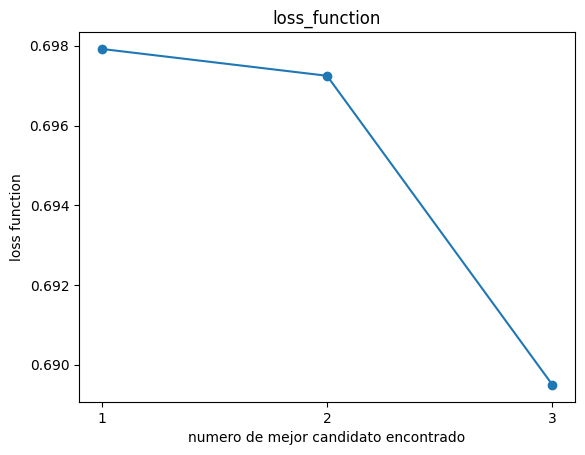

In [37]:
x = [x+1 for x in range(len(list_loss_function))]
plt.title("loss_function")
plt.xticks(x)
plt.ylabel("loss function")
plt.xlabel("numero de mejor candidato encontrado")
plt.scatter(x,list_loss_function)
plt.plot(x,list_loss_function)

In [32]:
x

[0, 1, 2]